In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline


Import Data

In [2]:
train_set = pd.read_csv('./input/train.csv')
test_set = pd.read_csv('./input/test.csv')
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Check the Embarked feature

In [3]:
train_set['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [4]:
train_set['Embarked'][train_set.Embarked.isna()].fillna('S', inplace=True)


In [5]:
train_set['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

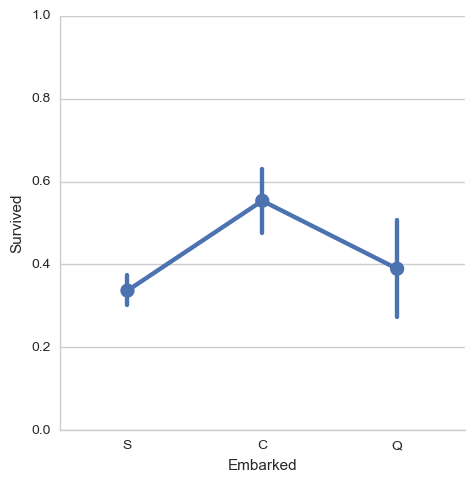

In [6]:
sns.set(style="whitegrid")
h = sns.PairGrid(data=train_set, x_vars=['Embarked'], y_vars='Survived', size=5)
h.map(sns.pointplot)
h.set(ylim=(0, 1))



In [7]:
train_set['Age'] = train_set['Age'].interpolate()
train_set['Age'].describe()


count    891.000000
mean      29.726061
std       13.902353
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

C:\Users\kissi\AppData\Local\Programs\Python\Python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


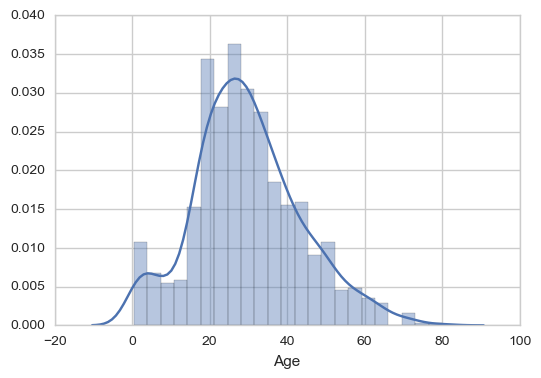

In [8]:
sns.distplot(train_set['Age'])


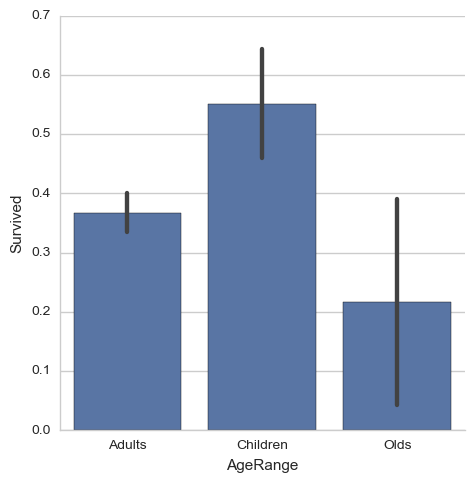

In [9]:
train_set['AgeRange'] = train_set['Age'].apply(
    lambda x: 'Children' if x <= 15 else ('Adults' if x <= 60 else 'Olds'))
a = sns.PairGrid(data=train_set, x_vars=['AgeRange'], y_vars='Survived', size=5)
a.map(sns.barplot)


'Sex' Feature is very important

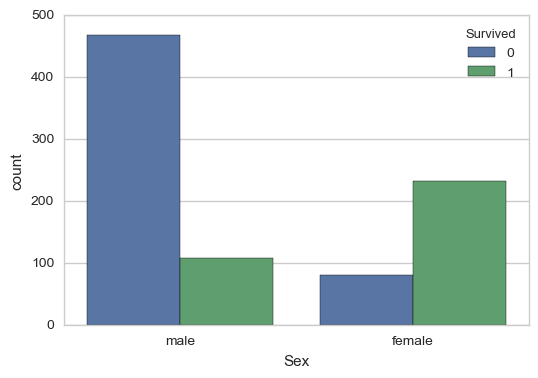

In [10]:
sns.countplot(data=train_set, x='Sex', hue='Survived')
# i = sns.PairGrid(data=train_set, x_vars=['Sex'], y_vars='Survived', size=5)
# i.map(sns.pointplot)

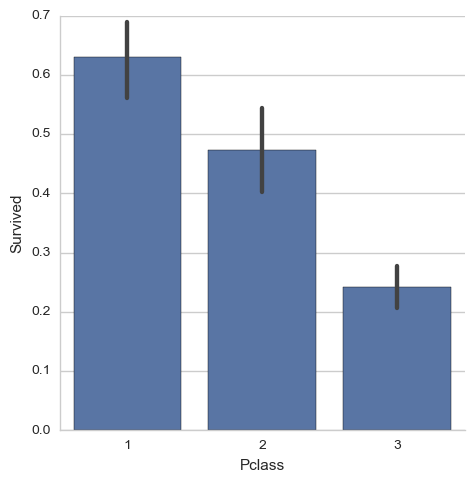

In [11]:
sns.set(style='whitegrid')
g = sns.PairGrid(data=train_set, x_vars=['Pclass'], y_vars=['Survived'], size=5)
g.map(sns.barplot)


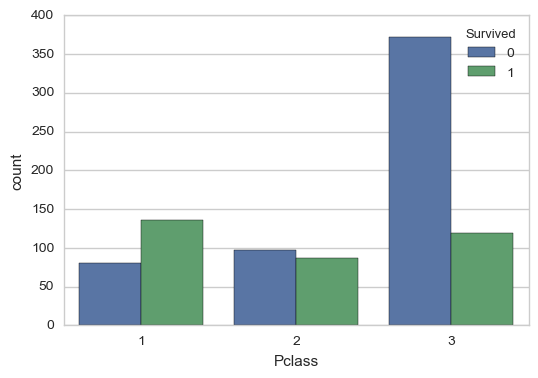

In [12]:
sns.countplot(data=train_set, x='Pclass', hue='Survived')


In [13]:
train_set['family'] = train_set['SibSp'] + train_set['Parch']
train_set = train_set.drop(['SibSp', 'Parch'], axis=1)


In [14]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeRange       891 non-null object
family         891 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 83.6+ KB


In [15]:
train_set = train_set.drop(['Name', 'Ticket',  'PassengerId', 'Age', 'Fare', 'Cabin'], axis=1)
train_set.head()

,Survived,Pclass,Sex,Embarked,AgeRange,family
0,0,3,male,S,Adults,1
1,1,1,female,C,Adults,1
2,1,3,female,S,Adults,0
3,1,1,female,S,Adults,1
4,0,3,male,S,Adults,0
